In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

import os
import json

from scipy.stats import linregress
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

## Load Data from 10k per lang sampling

In [2]:
entity_richness_df = pd.read_csv(
    "../../data/wikidata/wikipedia-entity-richness-10k-samples.csv"
)

In [3]:
entity_richness_df

,code,lang,average_words,average_total_entities,average_unique_entities,average_total_target_entities,average_unique_target_entities,language_script,language_family,LLama_score
0,ca:,Catalan,386.4352,26.5070,19.5319,3.8204,2.3064,Latin,Romance,84.01
1,da:,Danish,255.7695,22.7107,16.8970,3.2939,2.0761,Latin,Germanic,81.79
2,de:,German,418.5911,40.9469,30.4609,3.9036,2.4097,Latin,Germanic,85.74
3,en:,English,463.1478,70.1181,50.1902,6.8614,3.6812,latin,Germanic,89.40
4,es:,Spanish,470.5506,33.0414,23.8025,4.2502,2.4056,Latin,Romance,81.74
5,fr:,French,491.9274,36.8189,26.2652,4.4849,2.5791,Latin,Romance,84.18
6,hr:,Croatian,273.2872,24.9753,19.6839,0.8701,0.5975,Latin,Slavic,76.69
7,it:,Italian,391.6706,31.0902,21.5230,3.9515,2.2414,Latin,Romance,84.39
8,nl:,Dutch,156.5349,25.2445,19.7739,1.8523,1.2847,Latin,Germanic,85.35
9,pl:,Polish,214.2879,32.7062,25.7368,0.8957,0.5988,Latin,Slavic,77.50


## Check relationship between score and stats from wikipedia sampling

In [39]:
entity_richness_df["average_words"].corr(entity_richness_df["LLama_score"])

0.14916100054162695

In [40]:
entity_richness_df["average_total_entities"].corr(entity_richness_df["LLama_score"])

0.2968840398609711

In [41]:
entity_richness_df["average_unique_entities"].corr(entity_richness_df["LLama_score"])

0.2578993602132841

In [42]:
entity_richness_df["average_total_target_entities"].corr(
    entity_richness_df["LLama_score"]
)

0.7423438496782907

In [43]:
entity_richness_df["average_unique_target_entities"].corr(
    entity_richness_df["LLama_score"]
)

0.7771119983978775

In [44]:
pearsons_r, p = pearsonr(entity_richness_df["average_unique_target_entities"],  entity_richness_df["LLama_score"])
reject = "REJECT" if p <= 0.05 else "ACCEPT"

if p < 0.001:
    p = "< .001"

    print(
        f"We observe a correlation between the average unique target entities on the page and the performance on CKA:\n*Pearson's r* of {np.round(pearsons_r, 2)} and a p-value of {p}."
    )
    print(
        f"We can {reject} the null hypothesis that these two values do not share a linear relationship."
    )

We observe a correlation between the average unique target entities on the page and the performance on CKA:
*Pearson's r* of 0.78 and a p-value of < .001.
We can REJECT the null hypothesis that these two values do not share a linear relationship.


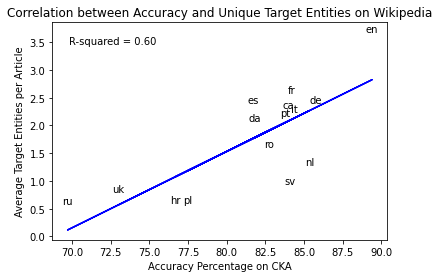

In [45]:
# create the graph

plt.title("Correlation between Accuracy and Unique Target Entities on Wikipedia")
plt.scatter(
    entity_richness_df["LLama_score"],
    entity_richness_df["average_unique_target_entities"],
    facecolors="none",
    edgecolors="none",
)

plt.xlabel("Accuracy Percentage on CKA")
plt.ylabel("Average Target Entities per Article")

# plt.yticks(range(0, max(stats["June_2022_article_count"]) + 500000, 500000))

# add trendline
slope, intercept, r_value, p_value, std_err = linregress(
    entity_richness_df["LLama_score"],
    entity_richness_df["average_unique_target_entities"],
)
plt.plot(
    entity_richness_df["LLama_score"],
    intercept + slope * entity_richness_df["LLama_score"],
    "b",
)

# add legend with r-squared value
r_squared = r_value**2
plt.annotate(
    "R-squared = {:.2f}".format(r_squared), xy=(0.05, 0.9), xycoords="axes fraction"
)

for i, txt in enumerate(entity_richness_df["code"]):
    plt.annotate(
        txt[:-1],
        (
            entity_richness_df["LLama_score"][i],
            entity_richness_df["average_unique_target_entities"][i],
        ),
        ha="center",
    )

plt.show()

## Other Summary Findings

In [46]:
entities_per_word = np.round(
    list(
        entity_richness_df["average_words"]
        / entity_richness_df["average_total_entities"]
    ),
    2,
)
for i, code in enumerate(list(entity_richness_df["code"])):
    print(f"{code} wikipedia averages an entity every {entities_per_word[i]} words.")

ca: wikipedia averages an entity every 14.58 words.
da: wikipedia averages an entity every 11.26 words.
de: wikipedia averages an entity every 10.22 words.
en: wikipedia averages an entity every 6.61 words.
es: wikipedia averages an entity every 14.24 words.
fr: wikipedia averages an entity every 13.36 words.
hr: wikipedia averages an entity every 10.94 words.
it: wikipedia averages an entity every 12.6 words.
nl: wikipedia averages an entity every 6.2 words.
pl: wikipedia averages an entity every 6.55 words.
pt: wikipedia averages an entity every 12.84 words.
ro: wikipedia averages an entity every 5.41 words.
ru: wikipedia averages an entity every 10.72 words.
sv: wikipedia averages an entity every 10.15 words.
uk: wikipedia averages an entity every 11.2 words.


In [47]:
target_entities_per_word = np.round(
    list(
        entity_richness_df["average_words"]
        / entity_richness_df["average_total_target_entities"]
    ),
    2,
)
for i, code in enumerate(list(entity_richness_df["code"])):
    print(
        f"{code} wikipedia averages a target entity every {target_entities_per_word[i]} words."
    )

ca: wikipedia averages a target entity every 101.15 words.
da: wikipedia averages a target entity every 77.65 words.
de: wikipedia averages a target entity every 107.23 words.
en: wikipedia averages a target entity every 67.5 words.
es: wikipedia averages a target entity every 110.71 words.
fr: wikipedia averages a target entity every 109.69 words.
hr: wikipedia averages a target entity every 314.09 words.
it: wikipedia averages a target entity every 99.12 words.
nl: wikipedia averages a target entity every 84.51 words.
pl: wikipedia averages a target entity every 239.24 words.
pt: wikipedia averages a target entity every 89.12 words.
ro: wikipedia averages a target entity every 96.65 words.
ru: wikipedia averages a target entity every 446.82 words.
sv: wikipedia averages a target entity every 73.34 words.
uk: wikipedia averages a target entity every 235.04 words.


## What is the most common target entity per language?

In [113]:
CODE_TO_LANG_DICT = {
    "bg": "Bulgarian",
    "ca": "Catalan",
    "cs": "Czech",
    "da": "Danish",
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "hr": "Croatian",
    "hu": "Hungarian",
    "it": "Italian",
    "nl": "Dutch",
    "pl": "Polish",
    "pt": "Portuguese",
    "ro": "Romanian",
    "ru": "Russian",
    "sl": "Slovenian",
    "sr": "Serbian",
    "sv": "Swedish",
    "uk": "Ukrainian",
}

In [114]:
# read in our log files
d = "../../data/wikidata/wiki_entity_logs"
article_titles_schedule = []
article_full_entities_schedule = []
article_target_entities_schedule = []
article_target_entity_unique_counts_schedule = []
langs = []
for filename in os.listdir("../../data/wikidata/wiki_entity_logs"):
    with open(os.path.join(d, filename), "r") as f:
        lang_code = filename[:2]
        print(f"Parsing {filename} for {CODE_TO_LANG_DICT[lang_code]}")
        data = json.load(f)

        for k, v in data.items():
            if v == False:
                print("No data for line_item {k}")
                continue
            article_info = v
            article_title = article_info["article_title"]
            article_id = article_info["article_id"]
            article_full_entities = article_info["article_full_entities"]
            article_target_entities = article_info["article_target_entities"]
            article_target_entities_unique_counts = article_info[
                "article_target_entities_uniques"
            ]

            article_titles_schedule.append(article_title + "_" + lang_code)
            article_full_entities_schedule.append(article_full_entities)
            article_target_entities_schedule.append(article_target_entities)
            article_target_entity_unique_counts_schedule.append(
                article_target_entities_unique_counts
            )
            langs.append(lang_code)

articles_df = pd.DataFrame(
    {
        "article_title": article_titles_schedule,
        "article_full_entities": article_full_entities_schedule,
        "article_target_entities": article_target_entities_schedule,
        "article_target_entity_unique_counts": article_target_entity_unique_counts_schedule,
        "lang_code": langs,
    }
)

articles_df.shape

Parsing ro-10000-wiki-entity-counts-2023-05-02-01h-07m-48s.json for Romanian
Parsing hr-10000-wiki-entity-counts-2023-05-01-23h-33m-17s.json for Croatian
Parsing it-10000-wiki-entity-counts-2023-05-02-00h-51m-37s.json for Italian
Parsing de-10000-wiki-entity-counts-2023-05-01-23h-32m-14s.json for German
Parsing da-10000-wiki-entity-counts-2023-05-01-20h-21m-35s.json for Danish
Parsing en-10000-wiki-entity-counts-2023-05-01-21h-18m-42s.json for English
Parsing pt-10000-wiki-entity-counts-2023-05-02-01h-28m-20s.json for Portuguese
Parsing es-10000-wiki-entity-counts-2023-05-01-21h-27m-54s.json for Spanish
Parsing sv-10000-wiki-entity-counts-2023-05-02-02h-27m-51s.json for Swedish
Parsing fr-10000-wiki-entity-counts-2023-05-01-22h-53m-39s.json for French
Parsing ru-10000-wiki-entity-counts-2023-05-01-22h-32m-21s.json for Russian
Parsing nl-10000-wiki-entity-counts-2023-05-02-00h-38m-58s.json for Dutch
Parsing ca-10000-wiki-entity-counts-2023-05-01-22h-50m-18s.json for Catalan
Parsing uk-1

(150000, 5)

In [151]:
# most common target entity per language

lang_counts = {}
for k in CODE_TO_LANG_DICT.keys():
    if k in ["bg", "hu", "sl", "sr", "cs"]:
        continue
    lang_counts[k] = {} 

In [152]:
for row in articles_df.iterrows():
    lang = row[1].article_title[-2:]
    if bool(row[1].article_target_entities) == True:
        for entity, count in row[1].article_target_entities.items():
            if entity in lang_counts[lang]:
                lang_counts[lang][entity] += count
            else:
                lang_counts[lang][entity] = count

In [160]:
for lang, d in lang_counts.items():
    # sort d
    sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
                
    # print first 5 items
    print(f"10 most frequent target entities on {CODE_TO_LANG_DICT[lang]} wiki sample")
    c = 0
    common = {}
    for k, v in sorted_d.items():
        common[k] = v
        c += 1
        if c == 10:
            break
    print(common)

10 most frequent target entities on Catalan wiki sample
{'Barcelona': 1705, 'United States': 1323, 'France': 994, 'Spain': 942, 'Madrid': 711, 'Europe': 664, 'Europa': 660, 'Catalonia': 646, 'Germany': 597, 'Italy': 591}
10 most frequent target entities on Danish wiki sample
{'Denmark': 2291, 'Copenhagen': 1420, 'USA': 1170, 'Internet Movie Database': 1050, 'Germany': 953, 'France': 770, 'Sweden': 749, 'Norway': 711, 'Europe': 582, 'Europa': 581}
10 most frequent target entities on German wiki sample
{'Germany': 1594, 'Berlin': 1593, 'Munich': 966, 'Paris': 797, 'Wien': 772, 'Vienna': 754, 'France': 717, 'London': 648, 'USA': 613, 'Austria': 581}
10 most frequent target entities on English wiki sample
{'American': 2692, 'French': 1306, 'London': 1196, 'France': 918, 'India': 888, 'Germany': 807, 'US': 799, 'New York': 789, 'England': 774, 'Russian': 719}
10 most frequent target entities on Spanish wiki sample
{'Spain': 1728, 'Mexico': 1075, 'France': 1017, 'Madrid': 983, 'United States

In [161]:
# most frequent overall entities

lang_counts = {}
for k in CODE_TO_LANG_DICT.keys():
    if k in ["bg", "hu", "sl", "sr", "cs"]:
        continue
    lang_counts[k] = {} 

In [162]:
for row in articles_df.iterrows():
    lang = row[1].article_title[-2:]
    if bool(row[1].article_full_entities) == True:
        for entity, count in row[1].article_full_entities.items():
            if entity in lang_counts[lang]:
                lang_counts[lang][entity] += count
            else:
                lang_counts[lang][entity] = count

In [163]:
for lang, d in lang_counts.items():
    # sort d
    sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
                
    # print first 5 items
    print(f"10 most frequent entities on {CODE_TO_LANG_DICT[lang]} wiki sample")
    c = 0
    common = {}
    for k, v in sorted_d.items():
        common[k] = v
        c += 1
        if c == 10:
            break
    print(common)

10 most frequent entities on Catalan wiki sample
{'Barcelona___LOC': 1705, 'Estats Units___LOC': 1322, 'França___LOC': 1026, 'Espanya___LOC': 941, 'Madrid___LOC': 711, 'Europa___LOC': 660, 'Catalunya___LOC': 646, 'Alemanya___LOC': 597, 'Itàlia___LOC': 591, 'Roma___PER': 561}
10 most frequent entities on Danish wiki sample
{'Danmark___LOC': 2286, 'København___LOC': 1444, 'USA___LOC': 1170, 'Internet Movie Database___ORG': 1050, 'Tyskland___LOC': 952, 'Sverige___LOC': 749, 'Frankrig___LOC': 712, 'Norge___LOC': 710, 'Europa___LOC': 581, 'England___LOC': 570}
10 most frequent entities on German wiki sample
{'Deutschland___LOC': 1632, 'Berlin___LOC': 1619, 'Kirche___ORG': 1201, 'München___LOC': 993, 'Stadt___LOC': 964, 'Sohn___PER': 805, 'Paris___LOC': 798, 'Wien___LOC': 775, 'Frankreich___LOC': 708, 'London___LOC': 681}
10 most frequent entities on English wiki sample
{'first___ORDINAL': 8730, 'two___CARDINAL': 5703, 'one___CARDINAL': 4185, 'three___CARDINAL': 2951, 'second___ORDINAL': 270

## ANOVA for target entities

* e.g. for every language we would want, the counts of unique target entities

In [52]:
code_to_counts = {}
for code in set(list(articles_df["lang_code"])):
    code_to_counts[code] = list(
        articles_df[articles_df["lang_code"] == code][
            "article_target_entity_unique_counts"
        ]
    )

In [53]:
assert len(code_to_counts) == len(set(list(articles_df["lang_code"])))

In [54]:
# perform one-way ANOVA test
f_statistic, p_value = f_oneway(*code_to_counts.values())

reject = "REJECT" if p_value <= 0.05 else "ACCEPT"

if p_value < 0.001:
    p_value = "< .001"


print(
    f"For unique target entity appearances, we see an f-statistic of {f_statistic} and a p-value of {p_value}."
)

print(
    f"We can {reject} the null hypothesis none of the target entity unique values are significantly different."
)

For unique target entity appearances, we see an f-statistic of 639.8929741386521 and a p-value of < .001.
We can REJECT the null hypothesis none of the target entity unique values are significantly different.


## Load Data from geo-entity articles

In [10]:
filename = "../../data/wikidata/en-0-wiki-entity-counts-geo-sampling-2023-05-04-08h-22m-12s.json"

article_titles_schedule = []
article_locations_schedule = []
article_word_counts_schedule = []
article_full_entities_schedule = []
article_target_entities_schedule = []
article_target_entity_unique_counts_schedule = []

with open(filename, "r") as f:
    data = json.load(f)
    
    for k, v in data.items():
        if v == False:
            print("No data for line_item {k}")
            continue
        article_info = v
        article_title = article_info["article_title"]
        article_word_count = article_info["article_word_count"]
        article_location = article_info["article_location"]
        article_full_entities = article_info["article_full_entities"]
        article_target_entities = article_info["article_target_entities"]
        article_target_entities_unique_counts = article_info["article_target_entities_uniques"]

        article_titles_schedule.append(article_title)
        article_locations_schedule.append(article_location)
        article_word_counts_schedule.append(article_word_count)
        article_full_entities_schedule.append(article_full_entities)
        article_target_entities_schedule.append(article_target_entities)
        article_target_entity_unique_counts_schedule.append(article_target_entities_unique_counts)
            
articles_df = pd.DataFrame(
    {
        "article_title": article_titles_schedule,
        "article_location": article_locations_schedule,
        "article_word_count": article_word_counts_schedule,
        "article_full_entities": article_full_entities_schedule,
        "article_target_entities": article_target_entities_schedule,
        "article_target_entity_unique_counts": article_target_entity_unique_counts_schedule,
    }
)

articles_df.shape

(3185, 6)

In [11]:
geo_articles = articles_df[articles_df['article_word_count'] != 0]

In [12]:
geo_articles.columns

Index(['article_title', 'article_location', 'article_word_count',
       'article_full_entities', 'article_target_entities',
       'article_target_entity_unique_counts'],
      dtype='object')

In [13]:
geo_articles['article_location'].value_counts()

EU               884
AN               569
AS               528
North America    491
AF               190
OC               100
SA                67
Name: article_location, dtype: int64

In [14]:
# extremely high variance
geo_articles.groupby('article_location')['article_word_count'].describe()[['mean', 'std']]

,mean,std
article_location,,
AF,4129.826316,4510.524972
AN,319.841828,668.827203
AS,3830.426136,4423.960827
EU,2974.598416,4304.946367
North America,3004.808554,4283.813295
OC,2382.300000,3468.944641
SA,4743.656716,5134.016062


In [15]:
# on average, an article about asia is slightly richer than an article
# about north america
geo_articles.groupby('article_location')['article_target_entity_unique_counts'].describe()[['mean', 'std']]

,mean,std
article_location,,
AF,19.905263,19.014655
AN,3.536028,3.859667
AS,18.585227,20.286476
EU,19.200226,25.401366
North America,16.313646,21.762245
OC,11.990000,14.733659
SA,22.089552,21.772746


In [16]:
standard_errors = geo_articles.groupby(['article_location']).sem()['article_target_entity_unique_counts']

In [17]:
d = geo_articles.groupby('article_location')['article_target_entity_unique_counts'].describe()['mean'].reset_index()

In [18]:
d['standard_errors'] = standard_errors.to_dict().values()

In [19]:
d = d.sort_values(by = "mean", ascending=True)

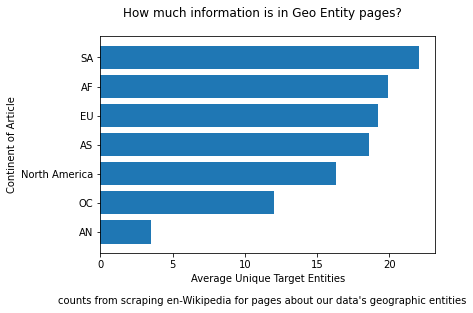

In [21]:
plt.barh("article_location", "mean", data=d)

plt.suptitle("How much information is in Geo Entity pages?")
plt.xlabel("Average Unique Target Entities")
plt.ylabel("Continent of Article")

txt = "counts from scraping en-Wikipedia for pages about our data's geographic entities"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment="center", fontsize=10)

# display the plot
plt.show()

## Check for connections

* is there a relationship between density of these articles and the location they are referring to?
    * yes (anova for unique entity counts, all locations) 
    * yes (anove for word counts, all locations
    * yes - t-test for word count, North America vs Asia
* what are the variances in word count / entity count between the locations?
    * graph dists

In [51]:
na_articles = geo_articles[geo_articles['article_location'] == 'North America']
af_articles = geo_articles[geo_articles['article_location']== 'AF']
eu_articles = geo_articles[geo_articles['article_location']== 'EU']
asia_articles = geo_articles[geo_articles['article_location']== 'AS']
oc_articles = geo_articles[geo_articles['article_location']== 'OC']
sa_articles = geo_articles[geo_articles['article_location']== 'SA']
an_articles = geo_articles[geo_articles['article_location']== 'AN']

In [52]:
t_stat, p = ttest_ind(list(na_articles["article_word_count"]),
                      list(asia_articles["article_word_count"]), equal_var = False)
reject = "REJECT" if p <= 0.05 else "ACCEPT"

if p < 0.001:
    p = "< .001"

print(f"Welch's t-test for the average number of unique target entities in NA vs. Asia reveals a t_stat of {t_stat} and a p value of {p}")
print(f"We can {reject} the null hypothesis that these two averages are identical")
if reject == "REJECT":
    print("we conclude that these two averages are significantly different.")

Welch's t-test for the average number of unique target entities in NA vs. Asia reveals a t_stat of -3.0260077065214106 and a p value of 0.0025404986562361748
We can REJECT the null hypothesis that these two averages are identical
we conclude that these two averages are significantly different.


In [53]:
# perform one-way ANOVA test
f_statistic, p_value = f_oneway(list(na_articles["article_word_count"]),
                               list(eu_articles["article_word_count"]),
                               list(asia_articles["article_word_count"]),
                               list(an_articles["article_word_count"]),
                               list(sa_articles["article_word_count"]),
                               list(af_articles["article_word_count"]),
                               list(oc_articles["article_word_count"]))

reject = "REJECT" if p_value <= 0.05 else "ACCEPT"

if p_value < 0.001:
    p_value = "< .001"


print(
    f"For article world count, we see an f-statistic of {f_statistic} and a p-value of {p_value}."
)

print(
    f"We can {reject} the null hypothesis none of the article word counts are significantly different."
)

For article world count, we see an f-statistic of 51.64522570228778 and a p-value of < .001.
We can REJECT the null hypothesis none of the article word counts are significantly different.


In [54]:
# perform one-way ANOVA test
f_statistic, p_value = f_oneway(list(na_articles["article_target_entity_unique_counts"]),
                               list(eu_articles["article_target_entity_unique_counts"]),
                               list(asia_articles["article_target_entity_unique_counts"]),
                               list(an_articles["article_target_entity_unique_counts"]),
                               list(sa_articles["article_target_entity_unique_counts"]),
                               list(af_articles["article_target_entity_unique_counts"]),
                               list(oc_articles["article_target_entity_unique_counts"]))

reject = "REJECT" if p_value <= 0.05 else "ACCEPT"

if p_value < 0.001:
    p_value = "< .001"


print(
    f"For article target entity unique count, we see an f-statistic of {f_statistic} and a p-value of {p_value}."
)

print(
    f"We can {reject} the null hypothesis none of the article target entity counts are significantly different."
)

For article target entity unique count, we see an f-statistic of 43.667546452989036 and a p-value of < .001.
We can REJECT the null hypothesis none of the article target entity counts are significantly different.


## Load Data from gender-entity articles

## Check for connections

* is there a relationship between density of these articles and the continent they are referring to?
    * anova
* what are the variances in word count / entity count between the continents?
    * graph dists

In [24]:
filename = "../../data/wikidata/en-0-wiki-entity-counts-gender-sampling-2023-05-04-19h-11m-50s.json"

article_titles_schedule = []
article_genders_schedule = []
article_word_counts_schedule = []
article_full_entities_schedule = []
article_target_entities_schedule = []
article_target_entity_unique_counts_schedule = []

with open(filename, "r") as f:
    data = json.load(f)
    
    for k, v in data.items():
        if v == False:
            print("No data for line_item {k}")
            continue
        article_info = v
        article_title = article_info["article_title"]
        article_word_count = article_info["article_word_count"]
        article_gender = article_info["article_gender"]
        article_full_entities = article_info["article_full_entities"]
        article_target_entities = article_info["article_target_entities"]
        article_target_entities_unique_counts = article_info["article_target_entities_uniques"]

        article_titles_schedule.append(article_title)
        article_genders_schedule.append(article_gender)
        article_word_counts_schedule.append(article_word_count)
        article_full_entities_schedule.append(article_full_entities)
        article_target_entities_schedule.append(article_target_entities)
        article_target_entity_unique_counts_schedule.append(article_target_entities_unique_counts)
            
articles_df = pd.DataFrame(
    {
        "article_title": article_titles_schedule,
        "article_gender": article_genders_schedule,
        "article_word_count": article_word_counts_schedule,
        "article_full_entities": article_full_entities_schedule,
        "article_target_entities": article_target_entities_schedule,
        "article_target_entity_unique_counts": article_target_entity_unique_counts_schedule,
    }
)

articles_df.shape

(869, 6)

In [40]:
gender_articles = articles_df

In [41]:
article_full_entities_unique_counts = []
article_full_entities_total_counts = []
for e in list(gender_articles["article_full_entities"]):
    article_full_entities_unique_counts.append(len(e))
    article_full_entities_total_counts.append(sum(e.values()))

In [56]:
article_target_entities_total_counts = []
for e in list(gender_articles["article_target_entities"]):
    article_target_entities_total_counts.append(sum(e.values()))

In [57]:
gender_articles["article_target_entities_total_counts"] = article_target_entities_total_counts

## Check for connections

* is there a relationship between density of these articles and the gender they are referring to?
    * yes, t-test for total count of target entities in men vs women articles
* what are the variances in word count / entity count between the genders?
    * summary stats confirm that both genders have a high variance in word/entity count
    * when looking at the longest/most-dense articles, overwhelming majority are about men

In [60]:
men_articles = gender_articles[gender_articles['article_gender'] == 'Male']
women_articles = gender_articles[gender_articles['article_gender']== 'Female']

In [62]:
t_stat, p = ttest_ind(list(men_articles["article_target_entities_total_counts"]),
                      list(women_articles["article_target_entities_total_counts"]), equal_var = False)
reject = "REJECT" if p <= 0.05 else "ACCEPT"

if p < 0.001:
    p = "< .001"

print(f"Welch's t-test for the total number of target entities in male vs. female pages reveals a t_stat of {t_stat} nad a p value of {p}")
print(f"We can {reject} the null hypothesis that these two averages are identical")
if reject == "REJECT":
    print("we conclude that these two averages are significantly different.")

Welch's t-test for the average number of unique target entities in male vs. female pages reveals a t_stat of 1.8329017696258276 nad a p value of 0.06815079267063434
We can ACCEPT the null hypothesis that these two averages are identical


In [58]:
# articles about men are denser,
# with more words and more target entities on average
gender_articles.groupby('article_gender')[['article_word_count', 'article_target_entities_total_counts']].describe()

article_word_count                                        \
                            count         mean         std   min    25%   
article_gender                                                            
Female                      138.0  1559.927536  2855.21295  24.0  276.5   
Male                        731.0  1981.347469  2782.26011  17.0  411.0   

                                        article_target_entities_total_counts  \
                  50%      75%      max                                count   
article_gender                                                                 
Female          601.0  1261.75  15843.0                                138.0   
Male            897.0  2187.00  18307.0                                731.0   

                                                                     
                     mean        std  min   25%   50%    75%    max  
article_gender                                                       
Female          27.688406  46.019640  1.0  5.25  12.0  25.75  353.0  
Male            35.829001  56.580015  1.0  8.00  17.0  38.50  572.0

In [67]:
t = gender_articles.sort_values(by="article_word_count", ascending=False)

In [70]:
# 7 of the top 10 longest articles were about men
t[['article_title', 'article_gender']].head(10)

,article_title,article_gender
467,Vladimir Putin,Male
321,Augustin-Jean Fresnel,Male
846,Whitney Houston,Female
311,Benjamin Netanyahu,Male
139,Mariah Carey,Female
664,Mitt Romney,Male
850,Britney Spears,Female
299,Benjamin Fondane,Male
293,Otto von Bismarck,Male
164,Bill Clinton,Male


In [75]:
t2 = gender_articles.sort_values(by="article_target_entities_total_counts", ascending=False)

In [76]:
# 9 out of the 10 "densest" (by target entities) were male subjects.
t2[['article_title', 'article_gender']].head(10)

,article_title,article_gender
467,Vladimir Putin,Male
81,Saladin,Male
293,Otto von Bismarck,Male
311,Benjamin Netanyahu,Male
42,Ludwig van Beethoven,Male
632,Eleanor Roosevelt,Female
256,Galileo Galilei,Male
170,Max Weber,Male
164,Bill Clinton,Male
299,Benjamin Fondane,Male


In [91]:
d = gender_articles.groupby('article_gender')['article_target_entities_total_counts'].describe()['mean'].reset_index()
standard_errors = gender_articles.groupby(['article_gender']).sem()['article_target_entities_total_counts']
d['standard_errors'] = standard_errors.to_dict().values()

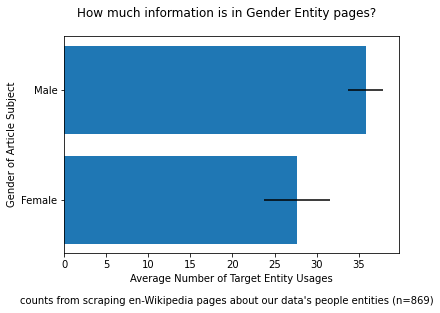

In [94]:
plt.barh("article_gender", "mean", data=d)

plt.suptitle("How much information is in Gender Entity pages?")
plt.xlabel("Average Number of Target Entity Usages")
plt.ylabel("Gender of Article Subject")
plt.errorbar(x=d["mean"], y=d["article_gender"], xerr=d["standard_errors"], fmt="none", color="black")

txt = "counts from scraping en-Wikipedia pages about our data's people entities (n=869)"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment="center", fontsize=10)

# display the plot
plt.show()